# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [4]:
X=StandardScaler().fit_transform(X)

In [5]:
#Kmeans
kmeans=cluster.KMeans(n_clusters=8)
kmeans.fit(X)
y_pred=kmeans.predict(X)

In [6]:
centers=kmeans.cluster_centers_

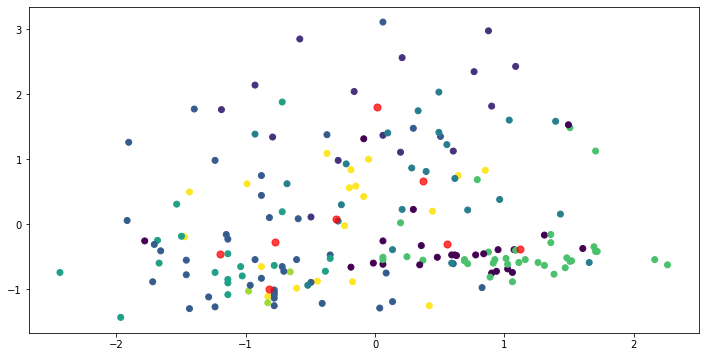

In [7]:

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
print ('Modelo KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y_pred)))

Modelo KMeans       : Silhouette Score:0.1451054316760636


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [10]:
kmeans=cluster.KMeans(n_clusters=5)
kmeans.fit(X)
y_pred=kmeans.predict(X)

In [11]:
centers=kmeans.cluster_centers_

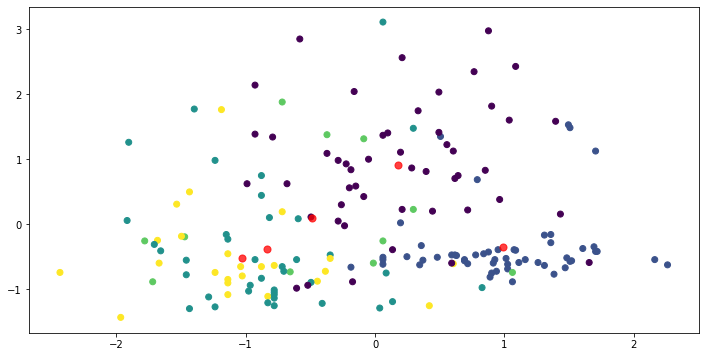

In [12]:

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

In [13]:
print ('Modelo KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y_pred)))

Modelo KMeans       : Silhouette Score:0.23445745485594077


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [14]:
kmeans=cluster.KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)

In [15]:
centers=kmeans.cluster_centers_

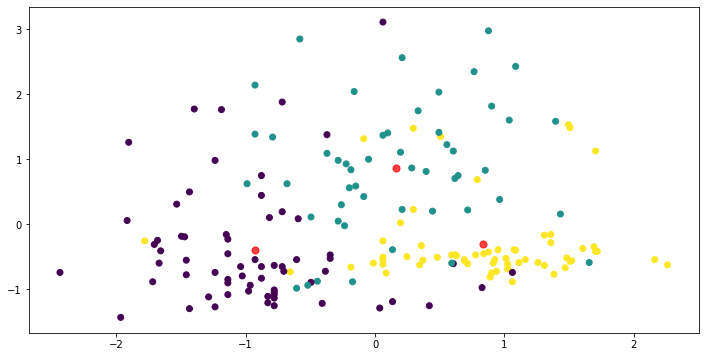

In [16]:

plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=0.75);

In [17]:
print ('Modelo KMeans       : Silhouette Score:{}'.format(silhouette_score(X, y_pred)))

Modelo KMeans       : Silhouette Score:0.2848589191898987


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [18]:
n_clusters, inercia = zip(*[(k, cluster.KMeans(n_clusters=k).fit(X).inertia_) for k in range(1, 10)])

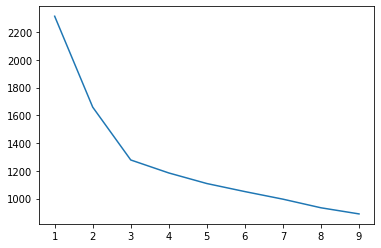

In [19]:

fig=plt.figure()

ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [20]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


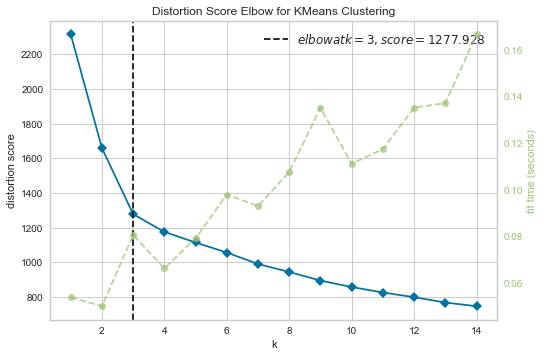

In [21]:

modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();
#the optimal clusters would be 3

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

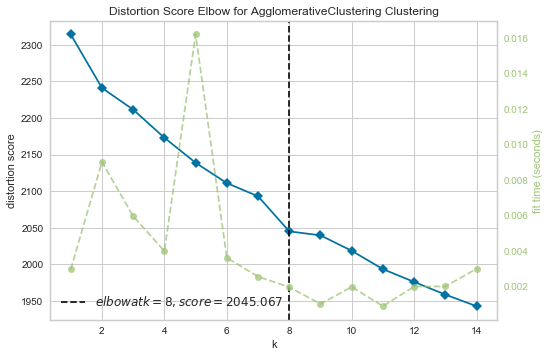

In [22]:
modelo=cluster.AgglomerativeClustering(linkage='single')

visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();
#with this model, 8 would be the ideal cluster number

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [23]:
import warnings
warnings.simplefilter('ignore')

from umap import UMAP

ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\danie\anaconda3\lib\site-packages\umap\__init__.py)

In [ ]:
def get_umap(data, n):
    
    umap=UMAP(n_components=n)
    emb=umap.fit_transform(data)
    
    return pd.DataFrame(emb, columns=[f'emb_{i+1}' for i in range(n)])

In [ ]:
umap_df=get_umap(data.data, 2)

umap_df.head()

In [ ]:
plt.scatter(umap_df.emb_1, umap_df.emb_2, c=data.target, cmap='Spectral', s=5)

plt.gca().set_aspect('equal', 'datalim')

plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('UMAP Projection');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA().fit(X)

pca_x=pca.transform(X)

In [ ]:
fig=plt.figure(figsize=(12, 8))

ax=[plt.subplot2grid((6, 1), (0, 0), rowspan=4),
    plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1],c=y_pred)

ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [24]:
from sklearn.manifold import TSNE

In [25]:
#X,y = datasets.load_wine(return_X_y=True)

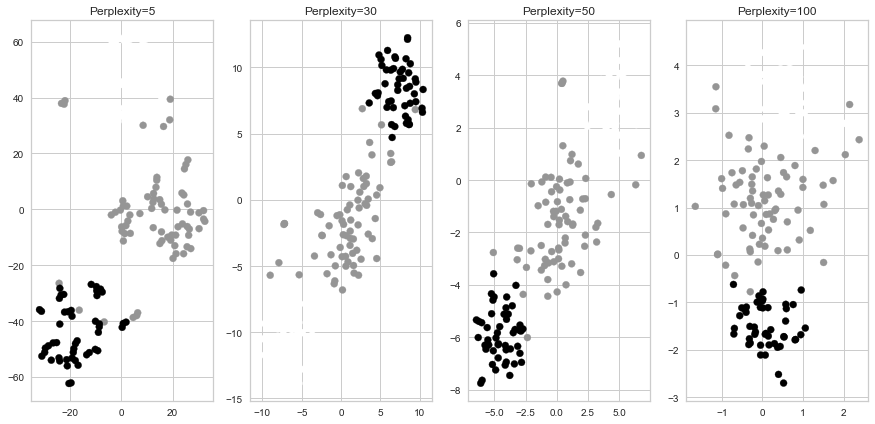

In [26]:

fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y)
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();
